In [64]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import glob

nx = 50
ny = 50
J = 1.0
run = 0

def read(filename):
    return np.genfromtxt(filename, delimiter=',')[:, :-1]

Ts = np.arange(0.05, 8.01, 0.05)
ms = np.zeros_like(Ts)
nruns = 1

for run in range(nruns):
    for i, T in enumerate(Ts):
        fname = f"run_{run}_{nx}_{ny}_T_{T:.06f}_J_{J:.06f}.txt"
        m = read(fname)
        ms[i] += np.mean(m)

ms /= nruns

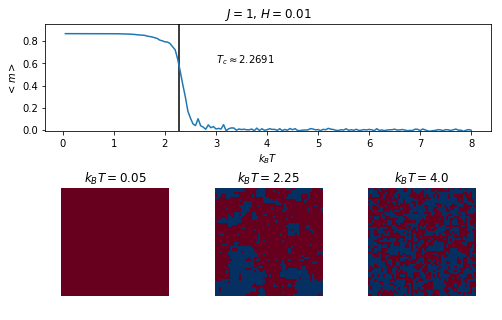

In [134]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(4, 6, hspace=2.25)
ax1 = plt.subplot(gs[0:2, 0:6])

Tc = 2*J / np.log(1 + np.sqrt(2))


ax1.plot(Ts, ms)
ax1.set_title('$J = 1$, $H=0.01$')
ax1.vlines(Tc, np.min(ms) + 2, np.max(ms) - 2)
ax1.set_ylim(np.min(ms)*1.1, np.max(ms)*1.1)
ax1.set_xlabel('$k_B T$')
ax1.set_ylabel('$<m>$')
ax1.text(3.0, 0.6, r"$T_c \approx 2.2691$")
ax2 = plt.subplot(gs[2:4, 0:2])
ax3 = plt.subplot(gs[2:4, 2:4])
ax4 = plt.subplot(gs[2:4, 4:])

axes = [ax2, ax3, ax4]
for ax, T in zip(axes, [0.05, 2.25, 4.0]):
    ax.imshow(read(f"run_0_{nx}_{ny}_T_{T:.06f}_J_{J:.06f}.txt"), cmap='RdBu')
    ax.set_title(f'$k_B T = {T}$')
    ax.axis('off')
    
plt.savefig('ising_pt.png', dpi=600)